# <b>Fondamenti di Analisi Dati</b> - a.a. 2020/2021

## 6 <b>Statistica Descrittica - Dati Multivariati</b>

### 6.1 Introduzione

La statistica descrittiva si occupa di descrivere, rappresentare e sintetizzare un campione di dati relativo ad una popolazione. Gli strumenti della statistica descrittiva possono essere sia numerici che grafici. I dati analizzati possono essere descritti secondo diversi aspetti.<br>
Esistono pertanto diversi "indicatori" oggettivi:
<ul>
<li><b>numerosità</b> del campione;
<li><b>indicatori centrali</b>: media, mediana, moda;
<li><b>indicatori di dispersione</b>: estremi, range, quantili, percentili, quartili, distanza inter-quartile, varianza;
<li><b>indicatori di forma</b>: simmetria/asimmetria rispetto alla media (skewness), "piattezza" o modalità di concentrazione dei dati intorno
alla media ("kurtosis").
</ul>
Per esplorare questi strumenti utilizzeremo il dataset Titanic già esaminato in precedenza.

In [1]:
import pandas as pd
titanic = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv', index_col='PassengerId')

In [2]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Il dataset contiene osservazioni e colonne. Visualizziamo le prime righe del DataFrame per vedere com'è composto.

In [3]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 6.2 Numerosità

La numerosità di un campione univariato$\{x_i\}_i^N$ è dato dal numero di valori in esso contenuto: $|X| = |\{x_i\}_i^N| = N$. La numerosità dei
campioni costituiti dalle singole colonne può essere ottenuta mediante il metodo <code>len</code>

In [4]:
print(len(titanic['Age']))

891


Il metodo <code>len</code> però non considera i dati incompleti (la colonna potrebbe contenere dei <code>NaN</code>). Per ottenere un conteggio più corretto possiamo esplicitamente eliminare i <code>NaN</code> con <code>dropna</code>

In [5]:
print(len(titanic['Age'].dropna()))

714


Come possiamo notare, il campione è meno numeroso di quello che sembrava. Alternativamente possiamo richiamare <code>info</code> sul
DataFrame

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Lo schema sopra mostra il numero di oggetti <code>non-null</code> per ogni colonna. Notiamo che abbiamo solo 714 elementi di <i>Age</i> validi.

### 6.3 Indicatori Centrali: Media, Mediana e Moda

Gli indicatori centrali danno un'idea approssimata dell'ordine di grandezza dei valori del campione.

#### 6.3.1 Media

La media di un campione è definita come la somma dei suoi valori diviso la sua numerosità: $\overline{X} = \frac{1}{N} \sum_{i}^{N} x_i$ . <br>Può essere calcolato manualmente.

In [7]:
titanic['Age'].sum()/len(titanic['Age'].dropna())

29.69911764705882

O attraverso il metodo <code>mean</code>

In [8]:
titanic['Age'].mean()

29.69911764705882

#### 6.3.2 Mediana

Quando gli elementi di un campione possono essere ordinati (ad esempio se sono valori numerici), la mediana di un campione (o
l'elemento mediano) è l'elemento che divide in due parti uguali l'insieme ordinato dei valori del campione. L'elemento mediano di può
ottenere ordinando i valori del campione e prendendo quello che si trova nella posizione intermedia.

In [9]:
import numpy as np
a=pd.Series([11,3,-5,7,-1,9,-12])
print(a.sort_values())
print("Mediana (calcolata manualmente): {}".format(a.sort_values().iloc[3])) #calcolata manualmente
print("Mediana:",a.median()) #calcolata tramite metodo median

6   -12
2    -5
4    -1
1     3
3     7
5     9
0    11
dtype: int64
Mediana (calcolata manualmente): 3
Mediana: 3.0


Calcoliamo ad esempio il valore mediano di <i>Age</i>.

In [10]:
titanic['Age'].median()

28.0

#### 6.3.3 Moda

La moda di un campione è l'elemento che si ripete più spesso. Possiamo calcolare la moda ordinando i valori per frequenza mediante
<code>value_counts</code> e selezionando l'indice del primo valore.

In [11]:
print(titanic['Age'].value_counts().head())
print("Moda: ",titanic['Age'].value_counts().index[0])

24.0    30
22.0    27
18.0    26
19.0    25
30.0    25
Name: Age, dtype: int64
Moda:  24.0


Per calcolare la moda in manieda rapida possiamo usare il metodo <code>mode</code>.

In [12]:
titanic['Age'].mode()

0    24.0
dtype: float64

### 6.4 Indicatori di dispersione: estremi, range, quartili

#### 6.4.1 Minimo, Massimo e Range

Semplici indici di dispersione sono il minimo ($min\{x_i\}_i^N$), il massimo (($max\{x_i\}_i^N$) e il range ($max\{x_i\}_i^N$ - $min\{x_i\}_i^N$).

In [13]:
print("Minimo:", titanic['Age'].min())
print("Massimo:", titanic['Age'].max())
print("Range:", titanic['Age'].max() - titanic['Age'].min())

Minimo: 0.42
Massimo: 80.0
Range: 79.58


Il range dei dati dipende fortemente dalla natura dei dati e dalla loro unità di misura. Ad esempio, le età dei passeggeri del Titanic si
misurano in anni, mentre i prezzi pagati per il biglietto in sterline. Per evitare problemi di stabilità di calcolo quando si utilizzano dati in unità di misure diverse è prassi comune normalizzarli in modo che il loro range sia compreso entro determinati limiti.

##### Normalizzazione tra 0 e 1

$$x_{norm} = (x-x_{min})/(x_{max}-x_{min})$$
che in Pandas possiamo eseguire così:

In [14]:
age_norm_01 = (titanic['Age']-titanic['Age'].min())/(titanic['Age'].max()-titanic['Age'].min())

In [15]:
print(age_norm_01.min(), age_norm_01.max()) #verifichiamo che gli estremi siano 0 e 1

0.0 1.0


##### Normalizzazione tra -1 e 1

$$x_{norm} = (x_{max} + x_{min} - 2x)/(x_{max} - x_{min})$$

In [16]:
age_norm_11 = (titanic['Age'].max()+titanic['Age'].min()-2*titanic['Age'])/(titanic['Age'].max()-titanic['Age'].min())

In [17]:
print(age_norm_11.min(), age_norm_11.max()) #verifichiamo che gli estremi siano -1 e 1

-1.0 1.0


#### 6.4.2 Quantili, Percentili e Quartili

In Pandas i quantili si ottengono tramite il medodo <code>quantile</code>

In [18]:
print("Quantile di ordine 0 (minimo):", titanic['Age'].quantile(0))
print("Quantile di ordine 0.5 (mediana):", titanic['Age'].quantile(0.5))
print("Quantile di ordine 1 (massimo):", titanic['Age'].quantile(1))
print("Quantile di ordine 0.15:", titanic['Age'].quantile(0.15))

Quantile di ordine 0 (minimo): 0.42
Quantile di ordine 0.5 (mediana): 28.0
Quantile di ordine 1 (massimo): 80.0
Quantile di ordine 0.15: 17.0


I percentili si ottengono sempre tramite il metodo <code>quantile</code> dividendo l'ordine del percentile per 100.

In [19]:
print("Percentile di ordine 50% (mediana):", titanic['Age'].quantile(50/100))
print("Percentile di ordine 30%:", titanic['Age'].quantile(30/100))

Percentile di ordine 50% (mediana): 28.0
Percentile di ordine 30%: 22.0


Analogamente i quartili si ottengono dividendo l'ordine del quantile per 4.

In [20]:
print("Quartile di ordine 0 (minimo):", titanic['Age'].quantile(0/4))
print("Quartile di ordine 1:", titanic['Age'].quantile(1/4))
print("Quartile di ordine 2 (mediana):", titanic['Age'].quantile(2/4))
print("Quartile di ordine 3:", titanic['Age'].quantile(3/4))
print("Quartile di ordine 4 (massimo):", titanic['Age'].quantile(4/4))

Quartile di ordine 0 (minimo): 0.42
Quartile di ordine 1: 20.125
Quartile di ordine 2 (mediana): 28.0
Quartile di ordine 3: 38.0
Quartile di ordine 4 (massimo): 80.0


### 6.5 Boxplot

I boxplot costituiscono un metodo di visualizzazione compatto per rappresentare alcune caratteristiche descrittive dei dati sotto analisi. In particolare, dato un campione, un boxplot riesce a rappresentarne efficacemente le seguenti quantità:
 * Valore mediano;
 * Primo e terzo quartile;
 * Minimo e massimo (a seconda della "versione" del boxplot, come discusso di seguito).

Possiamo visualizzare un boxplot direttamente mediante `Pandas`:

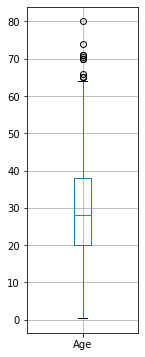

In [21]:
from matplotlib import pyplot as plt
titanic['Age'].plot.box(figsize=(2,6))
plt.grid()
plt.show()

Il boxplot si mostra come una "scatola" con dei "baffi" in cui:
 * l'estremo inferiore della scatola indica il primo quartile;
 * l'estremo superiore della scatola indica il terzo quartile;
 * la linea orizzontale in mezzo alla scatola rappresenta il valore mediano del campione;
 * il baffo inferiore rappresenta il primo valore nel campione che risulta essere maggiore o uguale al primo quartile meno una volta e mezza la distanza tra i il terzo e il primo quartile;
 * il baffo superiore rappresenta il primo valore nel campione che risulta essere minore o uguale al terzo quartile più una volta e mezza la distanza tra i il terzo e il primo quartile;
 * i tondini rappresentano i valori "fuori limite" che ricadono fuori dall'intervallo contrassegnato dai baffi. Vengono in genere considerati come "outliers".

Possiamo mostrare un boxplot anche mediante matplotlib.

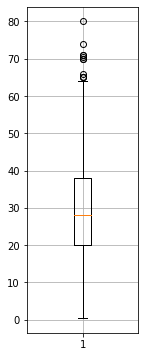

In [22]:
plt.figure(figsize=(2,6))
plt.boxplot(titanic['Age'].dropna()) #inseriamo dropna per eliminare i NaN
plt.grid()
plt.show()

#### 6.5.1 Boxplot Multipli

Mediante `Pandas` è possibile mostrare i boxplot di tutte le variabili numeriche di un DataFrame.

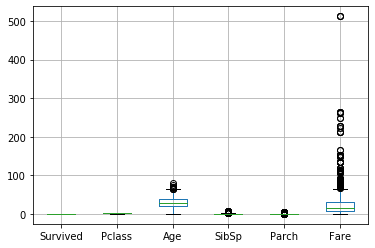

In [23]:
titanic.plot.box()
plt.grid()
plt.show()

Se vogliamo restringere l'analisi ad alcune variabili, possiamo selezionare solo le variabili interessate nel seguente modo:

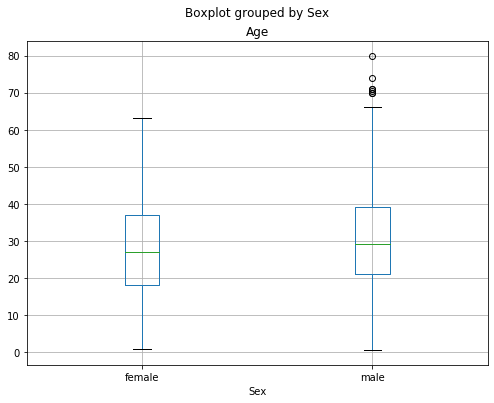

In [24]:
titanic.boxplot(by='Sex',column=['Age'], figsize=(8,6))
plt.show()

Nel caso di variabili multiple:

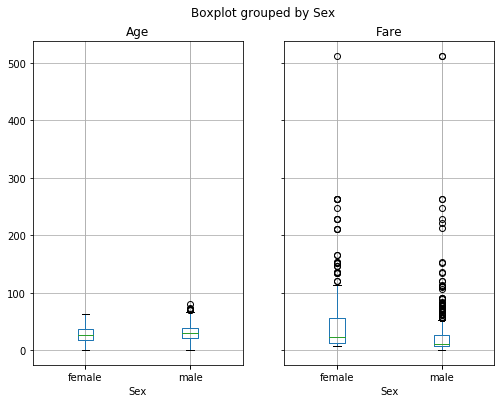

In [25]:
titanic.boxplot(by='Sex',column=['Age','Fare'], figsize=(8,6))
plt.show()

Possiamo anche combinare i boxplot con un `groupby`. Confrontiamo ad esempio le tariffe pagate da e donne appartenenti alle tre classi di imbarco.

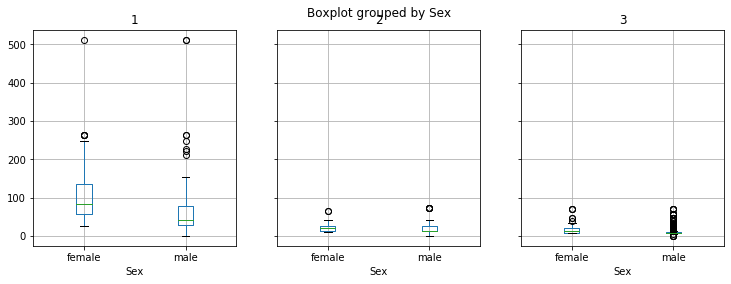

In [26]:
titanic.groupby('Pclass').boxplot(by='Sex',column=['Fare'], figsize=(12,4), layout=(1,3))
plt.show()

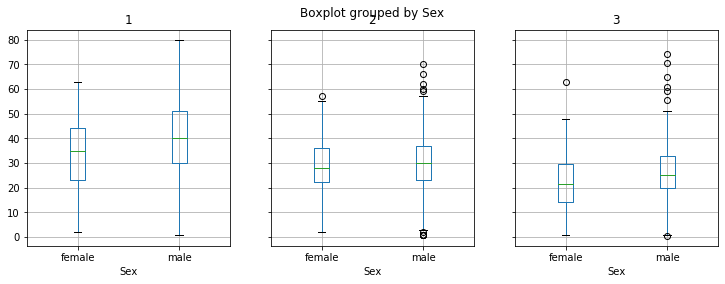

In [27]:
titanic.groupby('Pclass').boxplot(by='Sex',column=['Age'], figsize=(12,4), layout=(1,3))
plt.show()

### 6.6 Indicatori di dispersione (2), distanza inter-quartile e varianza

#### 6.6.1 Distanza interquartile

Il range non è un indice di dispersione molto robusto, in quanto non tiene conto della presenza di evenutali outliers. Si considerino ad esempio le seguenti popolazioni "artificiali":

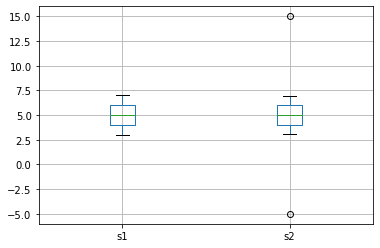

Range sample 1: 4.0
Range sample 2: 20.0


In [28]:
sample1 = np.linspace(3,7,100)
sample2 = sample1.copy()
sample2[0]=-5 #sostituiamo due valori con gli outliers -5
sample2[-1]=15 # e 15

df = pd.DataFrame({'s1':sample1,'s2':sample2})

df.plot.box()
plt.grid()
plt.show()

print("Range sample 1:",df['s1'].max()-df['s1'].min())
print("Range sample 2:",df['s2'].max()-df['s2'].min())

I campioni sono simili, ma la presenza di due outliers (-5 e 15) nel secondo campione rende i range molto diversi (4 e 20).

Confrontando i due boxplot mostrati sopra, notiamo che le posizioni del terzo e del primo quartile sono più "robuste" agli outliers. Una misura di dispersione un po' più espressiva è dunque lo **scarto interquartile** (o **distanza interquartile**), che si misura come la differenza tra il terzo e il primo quartile.

In [29]:
q11,q13 = df['s1'].quantile([1/4,3/4])
q21,q23 = df['s2'].quantile([1/4,3/4])
print("Lo scarto interquartile di sample 1 è:",q13-q11)
print("Lo scarto interquartile di sample 2 è:",q23-q21)

Lo scarto interquartile di sample 1 è: 2.0
Lo scarto interquartile di sample 2 è: 2.0


#### 6.6.2 Varianza e Deviazione Standard

La varianza (detto anche scarto quadratico medio) fornisce una stima di quanto i dati osservati si allontanano dalla media. La varianza calcola la media dei quadrati degli scarti dei valori rispetto alla media, penalizzando i grandi scostamenti dal valore medio (dovuti agli outliers) maggiormente più dei piccoli scostamenti:

\begin{equation}
s^2 = \frac{\sum_{i=1}^n(x_i-\overline x)^2}{n}
\end{equation}

La varianza può essere calcolata richiamando il metodo `var`.

In [30]:
print(df['s1'].var())
print(df['s2'].var())

1.3740094548175354
3.313403394211474


Gli indici di dispersione visti fino ad ora (esclusa la varianza) hanno come unità di misura la stessa dei dati di input. Nel caso della popolazione di età dei passeggeri del Titanic, i dati vengono misurati in anni. È pertanto corretto dire che **minimo**, **massimo**, **range**, **scarto interquartile** e **scarto medio assoluto** della popolazione si misurano in anni.

Lo stesso discorso non vale per la varianza, che si misurera in **anni al quadrato**. Se vogliamo ottenere una misura di dispersione **commensurabile**, possiamo calcolare la radice quadrata della varianza, ottenendo così la **deviazione standard** (o **scarto quadratico medio**), che si definisce come segue:

\begin{equation}
s = \sqrt{s^2}=\sqrt{\frac{\sum_{i=1}^n(x_i-x^2)}{n}}
\end{equation}

La **deviazione standard** si calcola mediante il metodo `std`.

In [31]:
print("Deviazione standard del campione:",titanic['Age'].std(),"anni")

Deviazione standard del campione: 14.526497332334044 anni


In [32]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


La deviazione standard ci dice qualcosa anche sulla "forma" della distribuzione. Confrontiamo ad esempio le deviazioni standard delle età dei passeggeri appartenenti alle tre classi di imbarco.

In [33]:
titanic.groupby('Pclass')['Age'].std()

Pclass
1    14.802856
2    14.001077
3    12.495398
Name: Age, dtype: float64

Confrontiamo adesso le densità stimate dai tre campioni:

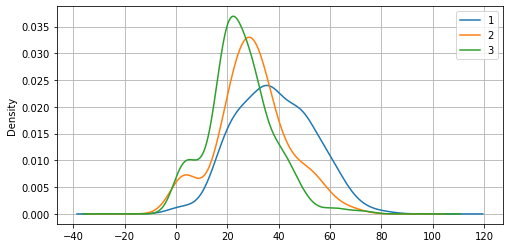

In [34]:
titanic.groupby('Pclass')['Age'].plot.density(figsize=(8,4))
plt.grid()
plt.legend()
plt.show()

#### 6.6.3 Standardizzazione (z-scoring)

In molti casi è utile normalizzare i dati in modo che essi presentino media nulla e deviazione standard unitaria. Questo tipo di normalizzazione viene detta "z-scoring" e viene effettuata sottraendo ai dati la media e dividendo per la deviazione standard. 

\begin{equation}
z_i = \frac{x_i-\mu_X}{\sigma_X}
\end{equation}

dove $\sigma_X$ è la deviazione standard della popolazione alla quale appartiene $X$. Si noti che gli zeta scores sono **adimensionali** (ovvero, non hanno unità di misura).

Possiamo effettuare questa normalizzazione usando la funzione `zscore` di `scipy`.

In [35]:
from scipy.stats import zscore
zscore([0,1,2,3,4])

array([-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356])

Applichiamo questa normalizzazione alle età dei passeggeri del Titanic.

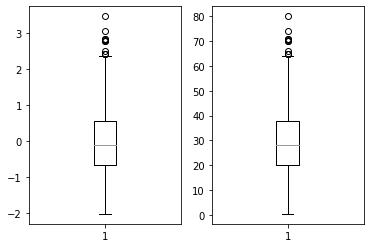

In [36]:
age_z=zscore(titanic['Age'].dropna())
plt.subplot(1,2,1)
plt.boxplot(age_z) #boxplot normalizzato
plt.subplot(1,2,2)
plt.boxplot(titanic['Age'].dropna()) #boxplot non normalizzato
plt.show()

Una interpretazione comune degli z-scores è che essi misurano la deviazione dalla media in termini di deviazione standard della popolazione rispondendo alla domande "quante $\sigma$ ci sono tra il campione e la media"? 

### 6.7 Indicatori di forma

Gli indicatori di forma permettono di farsi un'idea su determinati aspetti della "forma" della distribuzione.

#### 6.7.1 Asimmetria (skewness)
La skewness (momento di terzo ordine) è indice dello "sbilanciamento" a destra (valore positivo) o a sinistra (valore negativo) di un campione di dati rispetto al valore centrale. Se la skewness è zero, allora la distribuzione dei dati è bilanciata rispetto al valore centrale.<br>
<img src="skew.jpeg">
Calcoliamo la skewness di tutte le colonne del dataframe:

In [37]:
titanic.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.389108
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

In [38]:
titanic.mean()

Survived     0.383838
Pclass       2.308642
Age         29.699118
SibSp        0.523008
Parch        0.381594
Fare        32.204208
dtype: float64

In [39]:
titanic.median()

Survived     0.0000
Pclass       3.0000
Age         28.0000
SibSp        0.0000
Parch        0.0000
Fare        14.4542
dtype: float64

Consideriamo le variabili `Parch` e `Age` e visualizziamone il density plot:

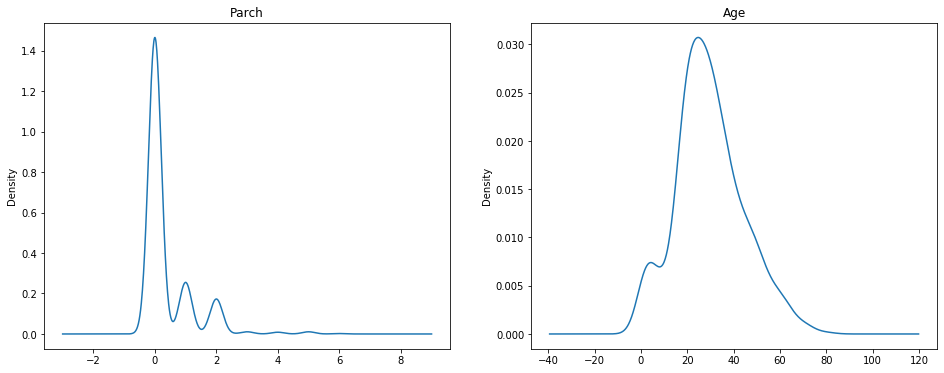

In [40]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.title('Parch')
titanic['Parch'].plot.density()
plt.subplot(122)
plt.title('Age')
titanic['Age'].plot.density()
plt.show()

#### 6.7.2 Curtosi (kurtosis)
L'indice di curtosi misura lo "spessore" delle code di una misura di densità. Nella versione implementata in `Pandas`, esso è definito come segue:

\begin{equation}
k=\frac{m^4}{\sigma^4} - 3
\end{equation}

dove $m^4$ è il quarto momento centrale, $\sigma^4$ è il quadrato della varianza e $\frac{m^4}{\sigma^4}=3$ nel caso di una distribuzione normale (dunque $k=0$ nel caso di una distribuzione Normale). L'indice va interpretato così:
 * Se è maggiore di zero, la distribuzione è *leptocurtica*, ovvero più "appuntita" di una distribuzione Normale;
 * Se è uguale a zero, la distribuzione è *normocurtica* (o *mesocurtica*), ovvero le code sono simili a quelle di una normale;
 * Se è minore di zero, la distribuzione è *platicurtica*, ovvero più "piatta" di una distribuzione Normale.
 
<img src="Kurtosis.jpg">
 
Calcoliamo gli indici di curtosi delle varie colonne:

In [41]:
titanic.kurtosis()

Survived    -1.775005
Pclass      -1.280015
Age          0.178274
SibSp       17.880420
Parch        9.778125
Fare        33.398141
dtype: float64

Stimiamo la densità di Fare, che mostra un alto indice di curtosi.

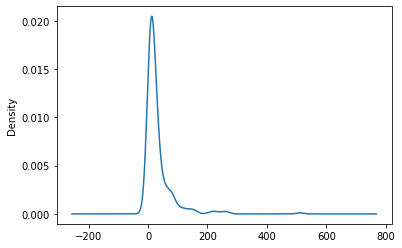

In [42]:
titanic['Fare'].plot.density()
plt.show()

### 6.8 Dati Multivariati

Abbiamo finora considerato dati univariati. In pratica, capita spesso che le osservazioni sotto analisi siano costituite da più variabili. In questi casi è utile considerare dei metodi per descrivere e visualizzare i dati in maniera multivariata, in modo da studiare le interazioni tra i vari fattori che descrivono il fenomeno in analisi. Considereremo il dataset delle iris di fisher come dataset di esempio. Carichiamo il dataset mediante la libreria `seaborn` e visualizziamone informazioni e prime righe.

In [43]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.info()
iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Il dataset contiene $150$ osservazioni riportanti le misure di 4 grandezze (lunghezza e larghezza di sepalo e petalo) per $150$ esemplari di iris appartenenti a tre specie diverse: Iris setosa, Iris virginica e Iris versicolor. 

L'immagine di seguito illustra il sepalo e il petalo di un fiore.
<img src='sepalo_petalo.jpg' style="width:200px">

Tutte le variabili sono numeriche, eccetto `species` che è categorica. Visualizziamone i valori univoci:

In [44]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Esploriamo i dati calcolando i principali indicatori statistici mediante `describe`.

In [45]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Confrontiamo le diverse variabili mediante boxplot:

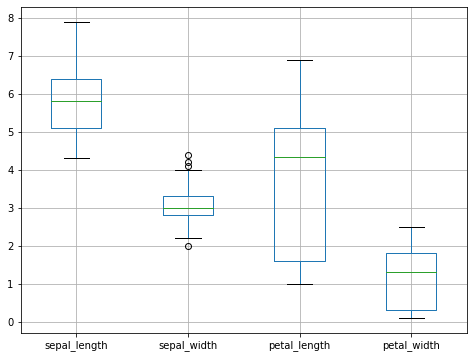

In [46]:
iris.plot.box(figsize=(8,6))
plt.grid()
plt.show()

#### 6.8.1 Scatter Plot

Il plot sopra ci permette di studiare alcune caratteristiche delle variabili. Tuttavia esso tratta i dati come $4$ campioni univariati indipendenti e dunque non mette in evidenza le eventuali relazioni che sussistono tra le variabili. Se consideriamo i dati in maniera univariata, possiamo considerare ognuna delle osservazioni come un punto che vive in uno spazio a $4$ dimensioni. In principio, sarebbe interessante studiare come tali dati si distribuiscono nello spazio, ma in pratica possiamo visualizzare al massimo punti dello spazio tridimensionale. Inoltre, i plot 3D sono in genere meno leggibili dei plot 2D. 

Un primo modo per visualizzare i dati, consiste dunque nello scegliere una coppia di variabili e plottare le osservazioni come se fossero punti in uno spazio 2D. Questo tipo di grafico si chiama **scatter plot**. Scegliamo ad esempio `sepal_width` e `petal_width` e visualizziamone lo scatter plot mediante la libreria `seaborn`:

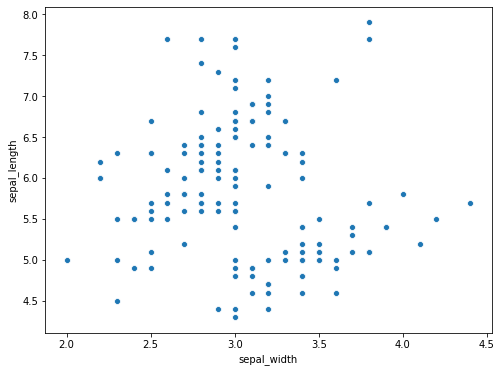

In [47]:
plt.figure(figsize=(8,6))
sns.scatterplot(iris['sepal_width'], iris['sepal_length'])
plt.show()

Possiamo colorare i punti in maniera diversa a seconda dell'appartenenza alle diverse classi di iris utilizzando il parametro `hue`.

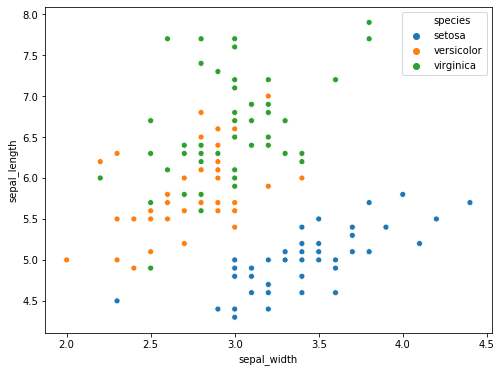

In [48]:
plt.figure(figsize=(8,6))
sns.scatterplot(iris['sepal_width'], iris['sepal_length'], hue=iris['species'])
plt.show()

Lo scatterplot può essere effettuato con diverse coppie di variabili. Consideriamo la coppia (`sepal_length`, `petal_length`).

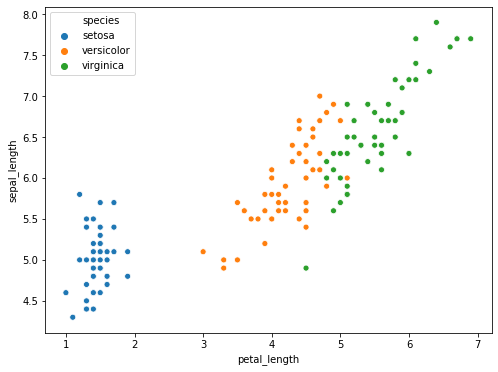

In [49]:
plt.figure(figsize=(8,6))
sns.scatterplot(iris['petal_length'], iris['sepal_length'], hue=iris['species'])
plt.show()

Come possiamo notare dai due plot, ogni coppia di variabili ci permette di vedere "una parte" delle possibili interazioni tra le diverse variabili. Per avere un quadro più completo, in pratica si visualizzano gli scatter plot di tutte le coppie possibili. Questo plot prende il nome di scatter matrix.<br>
Possiamo ottenere una scatter matrix con `seaborn` come segue:

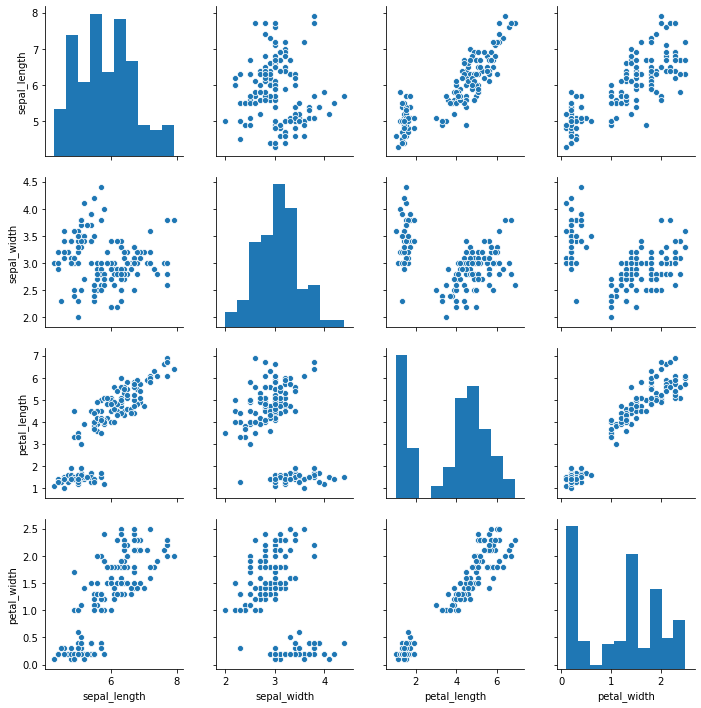

In [50]:
sns.pairplot(iris)
plt.show()

Possiamo evidenziare i punti per classe specificando una variabile sulla base della quale colorare i punti.

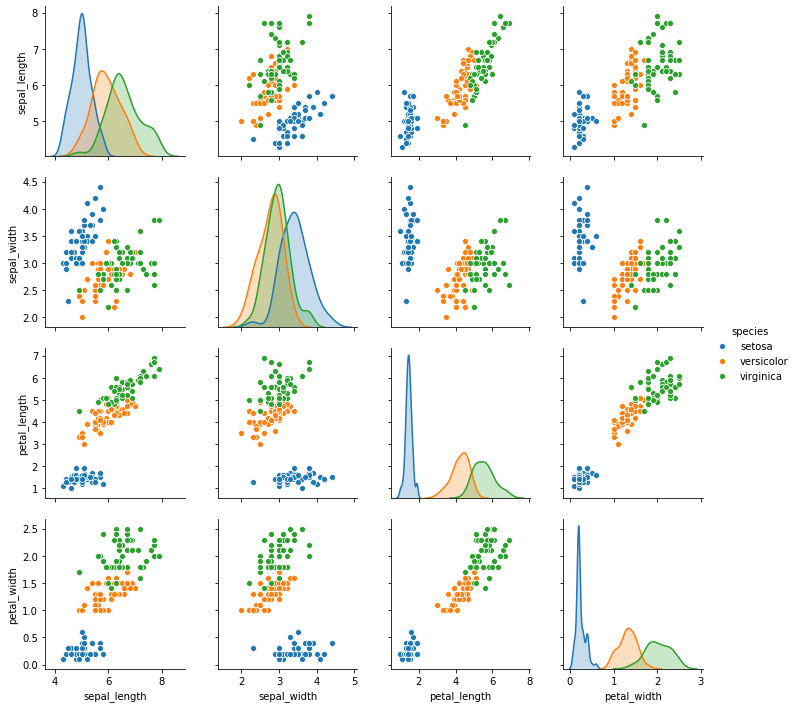

In [51]:
sns.pairplot(iris, hue='species')
plt.show()

#### 6.8.2 Medie e Covarianze

Nel caso **multivariato**, la **media** viene calcolata in maniera del tutto analoga al caso **univariato** come **media di vettori**. Possiamo banalmente calcolare la media dei nostri dati multivariati mediante il metodo `mean`.

In [52]:
print(iris.mean()) 

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64


Il risultato sarà un vettore (una serie di Pandas) che individua un punto nello spazio a quattro dimensioni che rappresenta la media delle osservazioni. Vediamo un semplice esempio a due dimensioni, considerando solo alcune variabili.

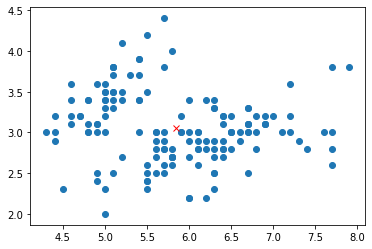

In [53]:
iris2d = iris[['sepal_length','sepal_width']]
mean_point = iris2d.mean()
plt.scatter(iris2d['sepal_length'],iris2d['sepal_width'])
plt.plot(mean_point[0], mean_point[1],'rx')
plt.show()

La X rossa rappresenta il punto medio del dataset bidimensionale considerato.

Il concetto di **varianza** viene generalizzato dal concetto di **covarianza** nel caso di dati bivariati. La covarianza misura quanto le due variabili varino assieme e si misura come segue:

\begin{equation}
\sigma_{XY} = \frac{1}{N}\sum_i^N (x_i - \overline x) (y_i - \overline y)
\end{equation}

dove $X$ e $Y$ sono le due variabili di interesse, $x_i$ è il valore di $X$ per l'iesima osservazione, $y_i$ è il valore di $Y$ per l'iesima osservazione e $\overline x$, $\overline y$ sono le medie delle osservazioni per le due variabili $X$ e $Y$.

Intuitivamente, la covarianza assumerà valori molto positivi quando $X$ e $Y$ variano in maniera concorde (ovvero, se $X$ assume valori alti, $Y$ assume valori alti e se $X$ assume valori bassi $Y$ assume valori bassi). In tal caso infatti i segni dei due fattori all'interno della sommatoria saranno concordi e il loro prodotto avrà segno positivo. Se invece $X$ e $Y$ variano in maniera discorde, il prodotto avrà segno negativo e la covarianza assumerà valori negativi.

In pratica, in presenza di più variabili, si calcolano le covarianze di tutte le coppie possibili di variabili, un po' come visto nel caso della scatter matrix. Ciò si ottiene mediante il metodo `cov`.

In [54]:
iris.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


In [55]:
iris.var()

sepal_length    0.685694
sepal_width     0.189979
petal_length    3.116278
petal_width     0.581006
dtype: float64

#### 6.8.3 Coordinate Parallele

Gli scatterplot permettono di esplorare le relazioni tra coppie di variabili. Quando i dati sono divisi in classi, un diagramma che permette di mostrare le relazioni tra variabili allo stesso tempo è il diagramma a coordinate parallele. Tali diagrammi si possono ottenere usando la funzione `parallel_coordinates` di `Pandas`.

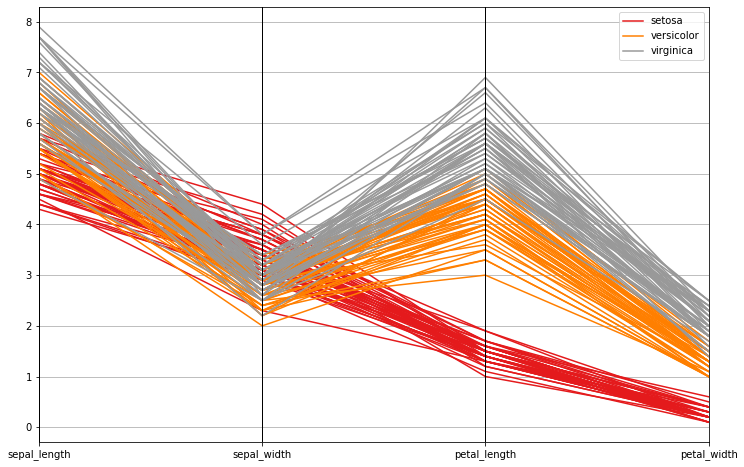

In [56]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(12,8))
parallel_coordinates(iris, 'species', colormap=plt.get_cmap("Set1"))
plt.show()

Nel plot visualizzato sopra:
 * Ogni asse verticale rappresenta una diversa variabile;
 * Ogni osservazione è rappresentata da un linea diversa;
 * Ogni linea congiunge i punti degli assi corrispondenti ai valori assunti dalle diverse variabili. Ad esempio, se un'osservazione assume valori $[10,2,5,4]$, la linea corrispondente intersecherà il primo asse nel punto di ordinata pari a $10$, il secondo nel punto di ordinata pari a $2$, il terzo nel punto di ordinata pari a $5$ e il quarto nel punto di ordinata pari a $4$;
 * Il colore di ogni riga identifica la classe di appartenenza dell'osservazione corrispondente, come da legenda.

Se vogliamo, possiamo restringere l'analisi ad alcune variabili come segue:

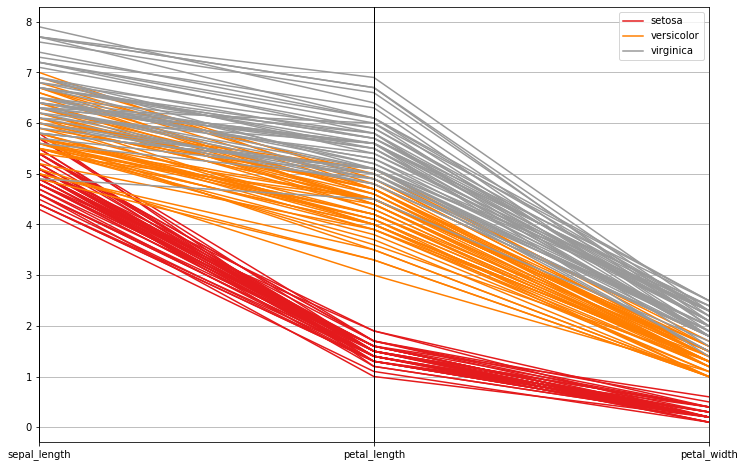

In [57]:
plt.figure(figsize=(12,8))
parallel_coordinates(iris[['sepal_length','petal_length','petal_width','species']], 
                     'species', colormap=plt.get_cmap("Set1"))
plt.show()

#### 6.8.4 Andrews plot

In data visualization, una curva di Andrews (o Andrews plot) viene utilizzata per visualizzare una struttura dati ad alta dimensione. Può essere considerato una versione “smoothed” di un grafico a coordinate parallele. 
Considerato un dato a d dimensioni $\mathrm{x\ =\ {x1,\ x2,\ ...,xd}}$, per visualizzare un diagramma di Andrews definiamo una serie di Fourier finita:

\begin{equation}
f_x(t)\ = \frac{x_1}{\sqrt2}+x_2sin{(t)}+\ x_3cos{(t)}+x_4sin{(2t)}+x_5cos{(2t)}+\ \cdots
\end{equation}
e plottiamo la funzione per $-\pi<t<\pi$.

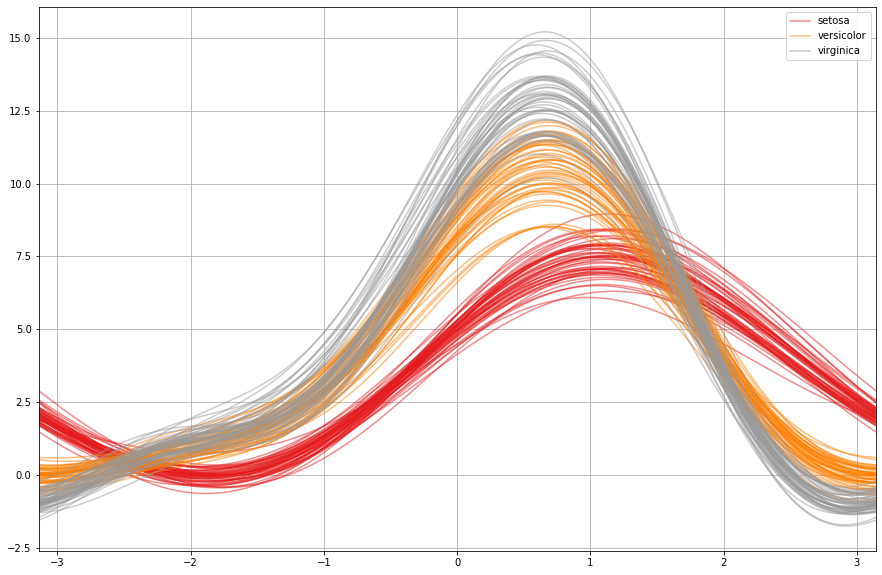

In [59]:
import pandas.plotting as pdplt
plt.figure(figsize=(15,10))
pdplt.andrews_curves(iris, 'species', alpha=0.5, colormap=plt.get_cmap("Set1"))

plt.show()

#### 6.8.5 Hist2d

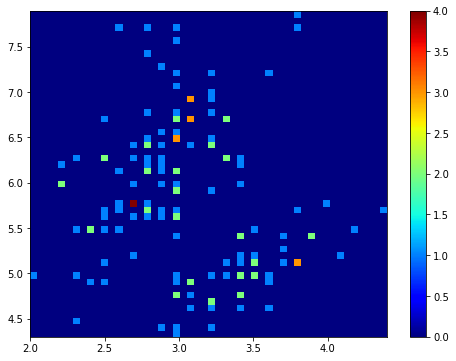

In [70]:
plt.figure(figsize=(8,6))
plt.hist2d(iris['sepal_width'], iris['sepal_length'], (50, 50), cmap=plt.cm.jet)
plt.colorbar()

## - Statistica descrittiva - FINE 